In [1]:
from util import *
%load_ext autoreload

In [2]:
%autoreload

# Search Space Reduction Heuristic

It seems that many methods (e.g. V-Opt, $\Sigma$-Opt, GRF-H EEM, SLS, etc) take on the order of $\mathcal{O}(N^2)$ calculations to find an optimal query point (or set of query points). This is because we often have to calculate some objective function that *for each unobserved point* requires a calcuation *over every point in the dataset*. Since we usually have the $N' \ll N$, then the number of unobserved points we need to do the calculation for still remains on the order of $\mathcal{O}(N)$.

However, searching over *all* unobserved data points is extraneous oftentimes, since we really want to look at just the more "informative" points which often includes those points on the optimal decision boundary. Our heuristic is to use the classification of an initial iteration of a given algorithm (e.g. *GL*, *Probit*, *BPC*) to define a *cut* of the dataset's underlying similarity graph. Using this cut, we obtain a surrogate decision boundary that hopefully approximates or includes similar nodes that the optimal decision boundary would have; as this "cut set" $S$ of nodes should be much smaller than the total number of unobserved data points in the data set (that is  $S \ll N - N'$), we should be able to reduce the order of the problem to something more manageable.


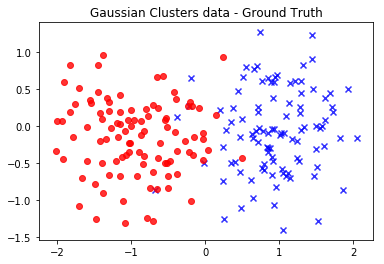

In [3]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[-1] = [Ns[0] + i for i in range(fs)]
ground_truth = np.array([1. if i<Ns[0] else -1. for i in range(N)])


# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)

# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20


# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.8)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.8)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

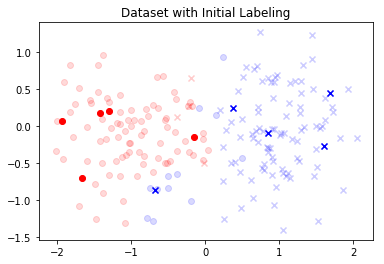

In [4]:
# Other Approximation for finding m restricted to the unlabeled set
fid = copy.deepcopy(fid_orig)
labeled = set()
gt_flipped = {}
indices = np.array(list(range(N)))
for k in fid.keys():
    k_mask = indices[ground_truth ==k]
    gt_flipped[k] = k_mask
    labeled = labeled.union(set(fid[k]))
unlabeled = sorted(list(set(indices) - labeled))
labeled = sorted(list(labeled)) 

# Initial solution - find m and C, keep track of y
B_diag = np.zeros(N)
B_diag[labeled] = 1.
B = sp.sparse.diags(B_diag, format='lil')


# Get our initial estimate, via BPC method
m, C, y = calc_orig(v, w, B, fid, labeled, unlabeled, tau, alpha, gamma2)
error, stats_obj = calc_stats(m, fid, gt_flipped)
plot_iter(stats_obj, X)

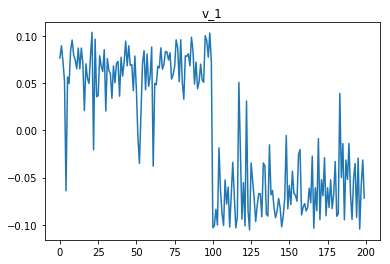

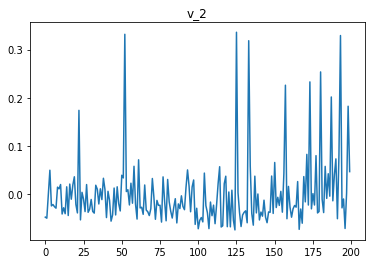

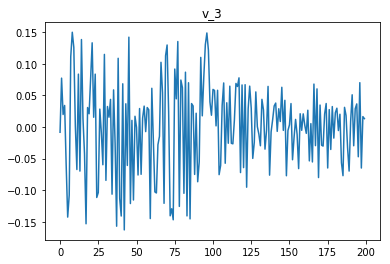

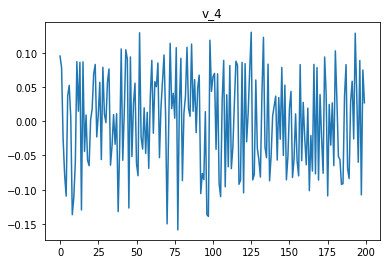

In [5]:
v1 = v[:,1]
v2 = v[:,2]
plt.plot([i for i in range(N)], v1)
plt.title('v_1')
plt.show()
plt.plot([i for i in range(N)], v2)
plt.title('v_2')
plt.show()

v3 = v[:,3]
v4 = v[:,4]
plt.plot([i for i in range(N)], v3)
plt.title('v_3')
plt.show()
plt.plot([i for i in range(N)], v4)
plt.title('v_4')
plt.show()

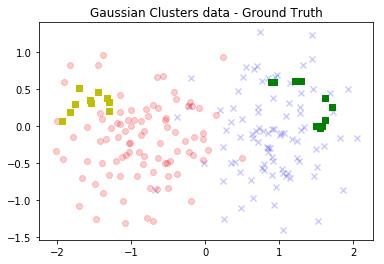

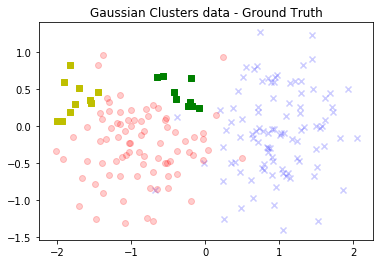

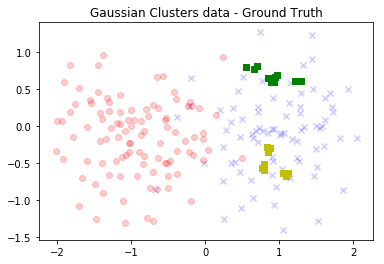

In [6]:
ind_max = (-v1).argsort()[:10]
ind_min = (v1).argsort()[:10]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

ind_max = (-v2).argsort()[:10]
ind_min = (v2).argsort()[:10]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()


ind_max = (-v3).argsort()[:10]
ind_min = (v3).argsort()[:10]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

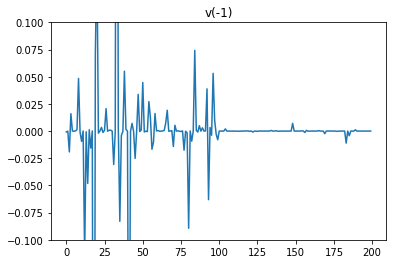

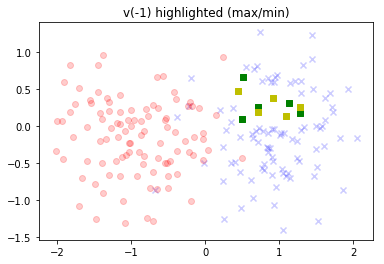

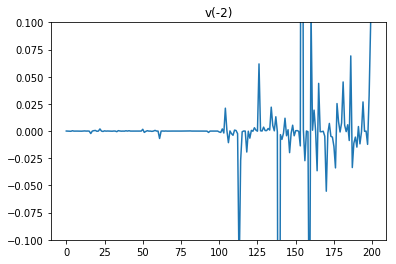

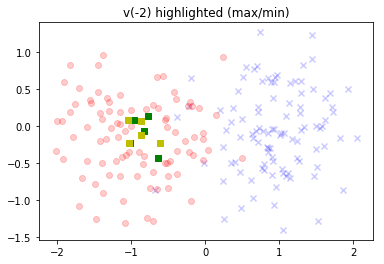

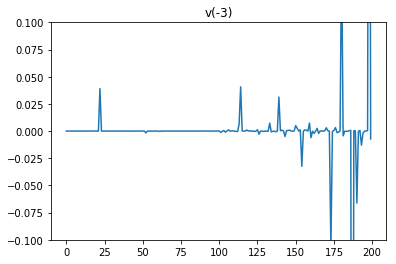

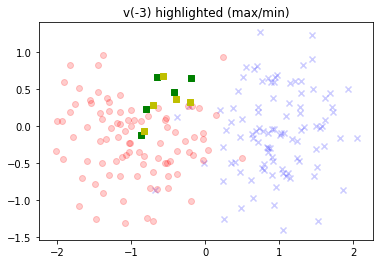

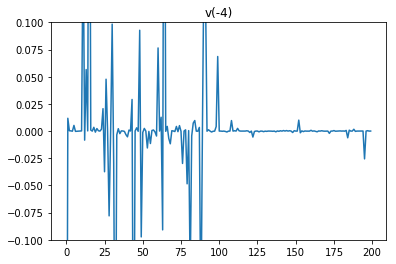

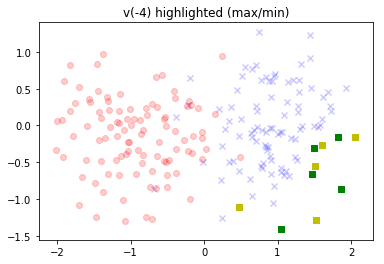

In [7]:
v_last = v[:,-1]
plt.plot([i for i in range(N)], v_last)
plt.ylim(-0.1,0.1)
plt.title('v(-1)')
plt.show()
ind_max = (-v_last).argsort()[:5]
ind_min = (v_last).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-1) highlighted (max/min)')
plt.show()


v_last2 = v[:,-2]
plt.plot([i for i in range(N)], v_last2)
plt.ylim(-0.1,0.1)
plt.title('v(-2)')
plt.show()
ind_max = (-v_last2).argsort()[:5]
ind_min = (v_last2).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-2) highlighted (max/min)')
plt.show()



v_last3 = v[:,-3]
plt.plot([i for i in range(N)], v_last3)
plt.ylim(-0.1,0.1)
plt.title('v(-3)')
plt.show()
ind_max = (-v_last3).argsort()[:5]
ind_min = (v_last3).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-3) highlighted (max/min)')
plt.show()


v_last4 = v[:,-4]
plt.plot([i for i in range(N)], v_last4)
plt.ylim(-0.1,0.1)
plt.title('v(-4)')
plt.show()
ind_max = (-v_last4).argsort()[:5]
ind_min = (v_last4).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.2)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-4) highlighted (max/min)')
plt.show()

In [8]:
calc_clusters = {}
calc_clusters[1] = np.where(m >= 0)[0]
calc_clusters[-1] = np.where(m < 0)[0]
c1_ind, c2_ind = W[np.ix_(calc_clusters[1], calc_clusters[-1])].nonzero()

In [9]:
search_nodes = set(calc_clusters[1][c1_ind]).union(set(calc_clusters[-1][c2_ind]))
print(search_nodes)

{193, 131, 4, 197, 133, 16, 148, 152, 120, 157, 163, 167, 105, 169, 110, 175, 51, 179, 53, 52, 183, 184, 125, 188, 189, 127}


In [10]:
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (10, False)
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, tag2, test_opts)

In [11]:
print(fid)
print(fid_orig)

chosen_nodes = set([])
chosen_nodes = chosen_nodes.union(set(fid[1]) - set(fid_orig[1]))

chosen_nodes = chosen_nodes.union(set(fid[-1]) - set(fid_orig[-1]))

print(search_nodes)
print(chosen_nodes)
print(search_nodes.intersection(chosen_nodes))

{1: [0, 1, 2, 3, 4, 53], -1: [100, 101, 102, 103, 104, 187, 163, 148, 108, 105, 189, 185, 167, 140]}
{1: [0, 1, 2, 3, 4], -1: [100, 101, 102, 103, 104]}
{193, 131, 4, 197, 133, 16, 148, 152, 120, 157, 163, 167, 105, 169, 110, 175, 51, 179, 53, 52, 183, 184, 125, 188, 189, 127}
{163, 167, 105, 108, 140, 148, 53, 185, 187, 189}
{163, 167, 105, 148, 53, 189}


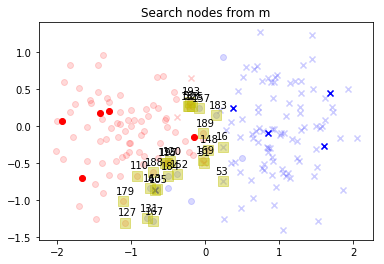

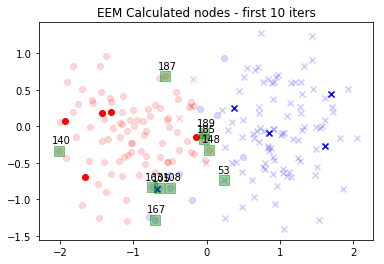

In [12]:
corr1 = stats_obj['corr1']
corr2 = stats_obj['corr2']
sup1 = stats_obj['sup1']
sup2 = stats_obj['sup2']
incorr1 = stats_obj['incorr1']
incorr2 = stats_obj['incorr2']

plt.scatter(X[corr1,0], X[corr1,1], marker='x', c='b', alpha=0.2)
plt.scatter(X[incorr1,0], X[incorr1,1], marker='x', c='r', alpha=0.2)
plt.scatter(X[corr2,0], X[corr2,1], marker='o', c='r',alpha=0.15)
plt.scatter(X[incorr2,0], X[incorr2,1], marker='o', c='b',alpha=0.15)
plt.scatter(X[sup1,0], X[sup1,1], marker='x', c='b', alpha=1.0)
plt.scatter(X[sup2,0], X[sup2,1], marker='o', c='r', alpha=1.0)

for s in search_nodes:
    plt.scatter(X[s,0], X[s,1], marker= 's', c='y', alpha= 0.4, s=100) # plot the new point to be included
    plt.annotate(r'%d' % s, (X[s,0], X[s,1]), xytext=(X[s,0]-0.1, X[s,1] + 0.1))
plt.axis('equal')

plt.title('Search nodes from m')
plt.show()

plt.scatter(X[corr1,0], X[corr1,1], marker='x', c='b', alpha=0.2)
plt.scatter(X[incorr1,0], X[incorr1,1], marker='x', c='r', alpha=0.2)
plt.scatter(X[corr2,0], X[corr2,1], marker='o', c='r',alpha=0.15)
plt.scatter(X[incorr2,0], X[incorr2,1], marker='o', c='b',alpha=0.15)
plt.scatter(X[sup1,0], X[sup1,1], marker='x', c='b', alpha=1.0)
plt.scatter(X[sup2,0], X[sup2,1], marker='o', c='r', alpha=1.0)

for c in chosen_nodes:
    plt.scatter(X[c,0], X[c,1], marker= 's', c='g', alpha= 0.4, s=100) # plot the new point to be included
    plt.annotate(r'%d' % c, (X[c,0], X[c,1]), xytext=(X[c,0]-0.1, X[c,1] + 0.1))
plt.axis('equal')

plt.title('EEM Calculated nodes - first 10 iters')
plt.show()

## Observations

I wonder if even just randomly sampling (or sampling *all* the cut node set $S$ would be good? It would be super fast... but I'm guessing it will restrict very quickly and level off at some accuracy.

Maybe also, another idea is to have a chosing mechanism that varies between exploration and exploitation to preserve the diversity in the sample space. Like a Bernoulli r.v. to either choose between the decision boundary cut set $S$ or a random node in the data set (or some other criterion that is more general than the cut set)?

# Last Eigenvector Checks - 2 Moons with (Un)normalized Laplacian

In [13]:
def compute_laplacian(W):
    D = sp.sparse.diags(np.sum(W, axis=0).getA().flatten())
    L = D - W
    return L, D.diagonal()

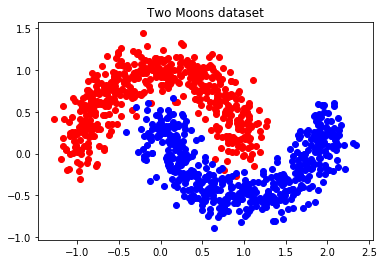

In [14]:
# Setup
N = 1000
data = make_moons(N, noise=0.15)

X, ground_truth = data
X1, X2 = X[ground_truth == 0,:], X[ground_truth == 1,:] 
ground_truth[np.where(ground_truth == 0)] = -1

#plt.rcParams['figure.figsize'] =(6,6)
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.title('Two Moons dataset')
plt.show()



# Define the labeled and unlabed indices
sup_percent = 0.1
indices = np.array(list(range(N)))
labeled_orig = set()
fid_orig = {}
gt_flipped = {}
for i in [-1,1]:
    i_mask = indices[ground_truth ==i]
    gt_flipped[i] = i_mask
    np.random.shuffle(i_mask)
    n_i = len(i_mask)
    fid_orig[i] = list(i_mask[:int(sup_percent*n_i)])
    labeled_orig = labeled_orig.union(set(fid_orig[i]))
unlabeled_orig = sorted(list(set(indices) - labeled_orig))
labeled_orig = sorted(list(labeled_orig))


# Graph Generation and Eigen-Calculation
W = make_sim_graph(X)
w,v = get_eig_Lnorm(W)


# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 5

## Normalized Laplacian

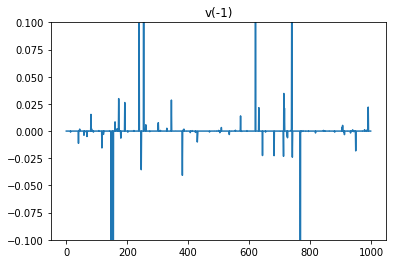

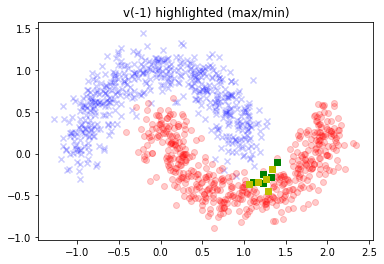

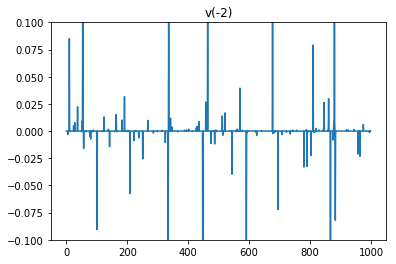

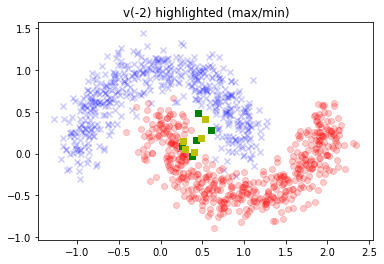

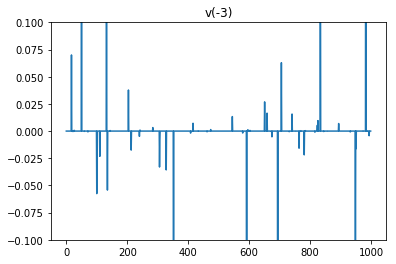

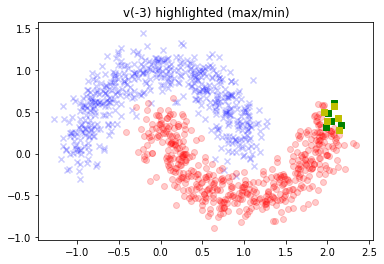

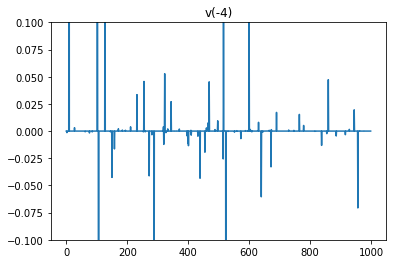

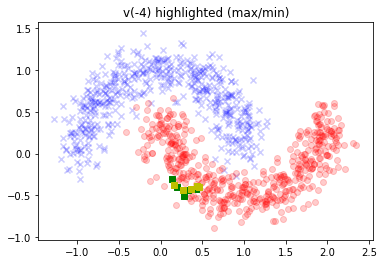

In [15]:
v_last = v[:,-1]
plt.plot([i for i in range(N)], v_last)
plt.ylim(-0.1,0.1)
plt.title('v(-1)')
plt.show()
ind_max = (-v_last).argsort()[:5]
ind_min = (v_last).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-1) highlighted (max/min)')
plt.show()


v_last2 = v[:,-2]
plt.plot([i for i in range(N)], v_last2)
plt.ylim(-0.1,0.1)
plt.title('v(-2)')
plt.show()
ind_max = (-v_last2).argsort()[:5]
ind_min = (v_last2).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-2) highlighted (max/min)')
plt.show()



v_last3 = v[:,-3]
plt.plot([i for i in range(N)], v_last3)
plt.ylim(-0.1,0.1)
plt.title('v(-3)')
plt.show()
ind_max = (-v_last3).argsort()[:5]
ind_min = (v_last3).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-3) highlighted (max/min)')
plt.show()


v_last4 = v[:,-4]
plt.plot([i for i in range(N)], v_last4)
plt.ylim(-0.1,0.1)
plt.title('v(-4)')
plt.show()
ind_max = (-v_last4).argsort()[:5]
ind_min = (v_last4).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-4) highlighted (max/min)')
plt.show()

48


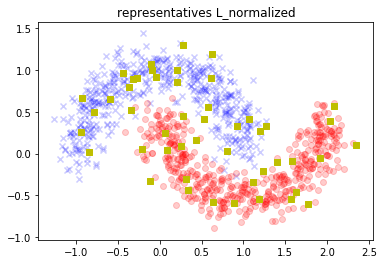

In [16]:
w_n,v_n, L_n = get_eig_Lnorm(W, True)
representatives_n = set([])
for i in range(50):
    v_i = v_n[:,-i]
    representatives_n = representatives_n.union([np.argmax(v_i)])
print(len(representatives_n))

plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[list(representatives_n),0], X[list(representatives_n),1], marker='s', c='y', alpha=1.0)
#plt.scatter(X[ind_min,0], X[ind_min,1], marker='o', c='g',alpha=1.0)
plt.axis('equal')
plt.title('representatives L_normalized')
plt.show()

## Unnormalized Laplacian

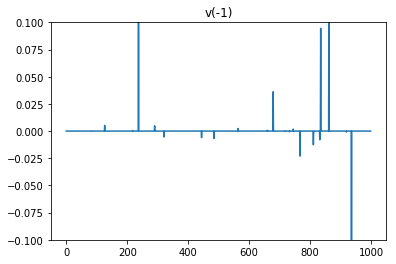

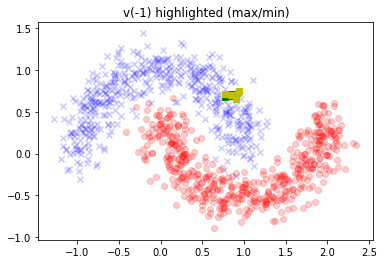

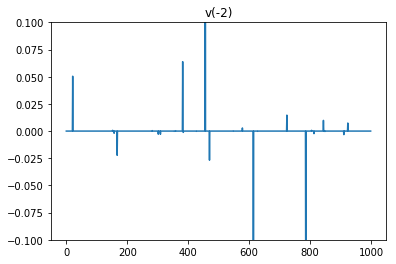

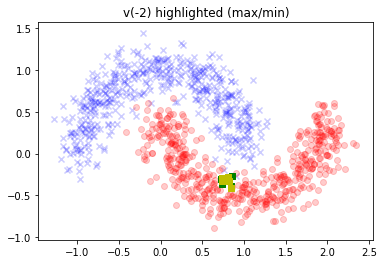

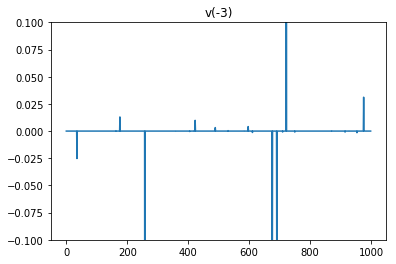

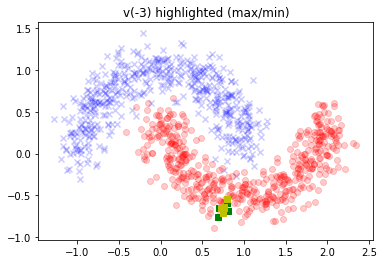

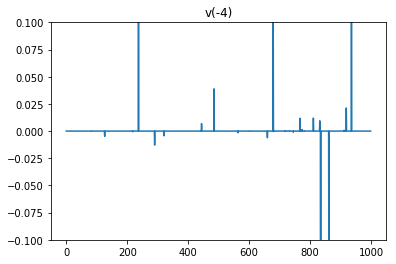

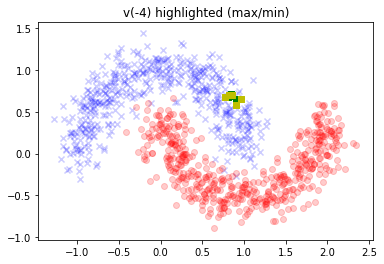

In [17]:
# unnormalized graph Laplacian
L_u, D_u = compute_laplacian(W)
w,v = sp.linalg.eigh(L_u.toarray())
v_last = v[:,-1]
plt.plot([i for i in range(N)], v_last)
plt.ylim(-0.1,0.1)
plt.title('v(-1)')
plt.show()
ind_max = (-v_last).argsort()[:5]
ind_min = (v_last).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-1) highlighted (max/min)')
plt.show()


v_last2 = v[:,-2]
plt.plot([i for i in range(N)], v_last2)
plt.ylim(-0.1,0.1)
plt.title('v(-2)')
plt.show()
ind_max = (-v_last2).argsort()[:5]
ind_min = (v_last2).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-2) highlighted (max/min)')
plt.show()



v_last3 = v[:,-3]
plt.plot([i for i in range(N)], v_last3)
plt.ylim(-0.1,0.1)
plt.title('v(-3)')
plt.show()
ind_max = (-v_last3).argsort()[:5]
ind_min = (v_last3).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-3) highlighted (max/min)')
plt.show()


v_last4 = v[:,-4]
plt.plot([i for i in range(N)], v_last4)
plt.ylim(-0.1,0.1)
plt.title('v(-4)')
plt.show()
ind_max = (-v_last4).argsort()[:5]
ind_min = (v_last4).argsort()[:5]
# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[ind_max,0], X[ind_max,1], marker='s', c='g', alpha=1.0)
plt.scatter(X[ind_min,0], X[ind_min,1], marker='s', c='y',alpha=1.0)
plt.axis('equal')
plt.title('v(-4) highlighted (max/min)')
plt.show()



In [18]:
representatives = set([])
for i in range(50):
    v_i = v[:,-i]
    representatives = representatives.union([np.argmax(v_i)])

In [19]:
print(len(representatives))

48


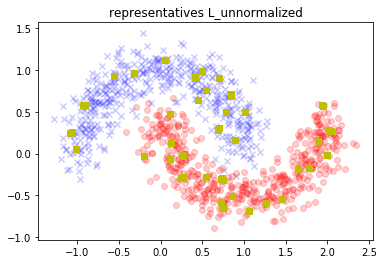

In [20]:
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X1[:,0], X1[:,1], marker='x', c='b', alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], marker='o', c='r',alpha=0.2)
plt.scatter(X[list(representatives),0], X[list(representatives),1], marker='s', c='y', alpha=1.0)
#plt.scatter(X[ind_min,0], X[ind_min,1], marker='o', c='g',alpha=1.0)
plt.axis('equal')
plt.title('representatives L_unnormalized')
plt.show()

# Calculating the Decision Boundary Nodes with m (Normalized)

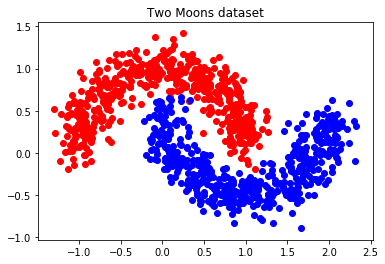

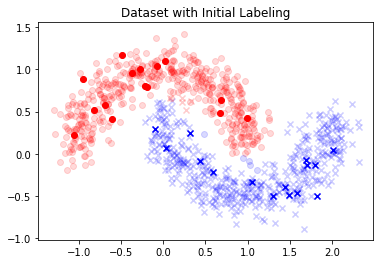

{704, 448, 319, 393, 778, 652, 470, 153, 482, 227, 164, 366, 944, 497, 562, 754, 315, 757, 186, 891, 575}


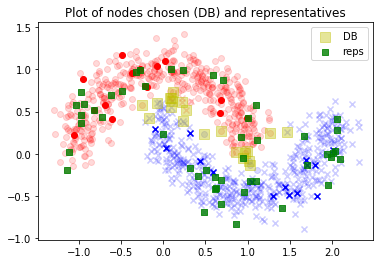

In [21]:
# Setup
N = 1000
data = make_moons(N, noise=0.15)

X, ground_truth = data
X1, X2 = X[ground_truth == 0,:], X[ground_truth == 1,:] 
ground_truth[np.where(ground_truth == 0)] = -1

#plt.rcParams['figure.figsize'] =(6,6)
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.title('Two Moons dataset')
plt.show()



# Define the labeled and unlabed indices
sup_percent = 0.03
indices = np.array(list(range(N)))
labeled_orig = set()
fid_orig = {}
gt_flipped = {}
for i in [-1,1]:
    i_mask = indices[ground_truth ==i]
    gt_flipped[i] = i_mask
    np.random.shuffle(i_mask)
    n_i = len(i_mask)
    fid_orig[i] = list(i_mask[:int(sup_percent*n_i)])
    labeled_orig = labeled_orig.union(set(fid_orig[i]))
unlabeled_orig = sorted(list(set(indices) - labeled_orig))
labeled_orig = sorted(list(labeled_orig))


# Graph Generation and Eigen-Calculation
W = make_sim_graph(X)
w,v = get_eig_Lnorm(W)


# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 5

# Other Approximation for finding m restricted to the unlabeled set
fid = copy.deepcopy(fid_orig)
labeled = set()
gt_flipped = {}
indices = np.array(list(range(N)))
for k in fid.keys():
    k_mask = indices[ground_truth ==k]
    gt_flipped[k] = k_mask
    labeled = labeled.union(set(fid[k]))
unlabeled = sorted(list(set(indices) - labeled))
labeled = sorted(list(labeled)) 

# Initial solution - find m and C, keep track of y
B_diag = np.zeros(N)
B_diag[labeled] = 1.
B = sp.sparse.diags(B_diag, format='lil')


# Get our initial estimate, via BPC method
m, C, y = calc_orig(v, w, B, fid, labeled, unlabeled, tau, alpha, gamma2)
error, stats_obj = calc_stats(m, fid, gt_flipped)
plot_iter(stats_obj, X)

# Calculate surrogate decision boundary nodes
calc_clusters = {}
calc_clusters[1] = np.where(m >= 0)[0]
calc_clusters[-1] = np.where(m < 0)[0]
c1_ind, c2_ind = W[np.ix_(calc_clusters[1], calc_clusters[-1])].nonzero()
db_nodes = set(calc_clusters[1][c1_ind]).union(set(calc_clusters[-1][c2_ind]))
print(db_nodes)

corr1 = stats_obj['corr1']
corr2 = stats_obj['corr2']
sup1 = stats_obj['sup1']
sup2 = stats_obj['sup2']
incorr1 = stats_obj['incorr1']
incorr2 = stats_obj['incorr2']

plt.scatter(X[corr1,0], X[corr1,1], marker='x', c='b', alpha=0.2)
plt.scatter(X[incorr1,0], X[incorr1,1], marker='x', c='r', alpha=0.2)
plt.scatter(X[corr2,0], X[corr2,1], marker='o', c='r',alpha=0.15)
plt.scatter(X[incorr2,0], X[incorr2,1], marker='o', c='b',alpha=0.15)
plt.scatter(X[sup1,0], X[sup1,1], marker='x', c='b', alpha=1.0)
plt.scatter(X[sup2,0], X[sup2,1], marker='o', c='r', alpha=1.0)

count = 0
for s in db_nodes:
    if count == 0:
        plt.scatter(X[s,0], X[s,1], marker= 's', c='y', alpha= 0.4, s=100, label='DB') # plot the new point to be included
        count += 1
    else:
        plt.scatter(X[s,0], X[s,1], marker= 's', c='y', alpha= 0.4, s=100) # plot the new point to be included
    #plt.annotate(r'%d' % s, (X[s,0], X[s,1]), xytext=(X[s,0]-0.1, X[s,1] + 0.1))
plt.scatter(X[list(representatives_n),0], X[list(representatives_n),1], marker='s', c='g', alpha=.8, label='reps')
plt.axis('equal')
plt.legend()
plt.title('Plot of nodes chosen (DB) and representatives')
plt.show()

# Calculate the Decision Boundary Nodes with m, Unnormalized Laplacian

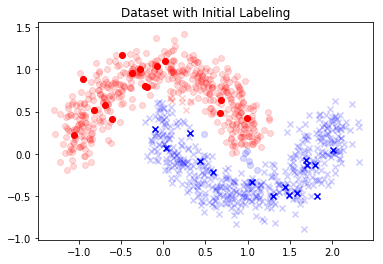

{448, 704, 835, 452, 319, 652, 470, 153, 227, 164, 995, 874, 366, 497, 562, 754, 757, 951, 186, 315, 575}


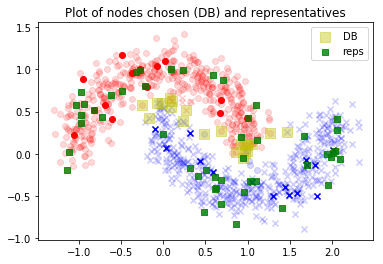

In [22]:
# Using the setup from the Normalized case above

# unnormalized graph Laplacian
L_u, D_u = compute_laplacian(W)
w,v = sp.linalg.eigh(L_u.toarray())


# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 5

# Other Approximation for finding m restricted to the unlabeled set
fid = copy.deepcopy(fid_orig)
labeled = set()
gt_flipped = {}
indices = np.array(list(range(N)))
for k in fid.keys():
    k_mask = indices[ground_truth ==k]
    gt_flipped[k] = k_mask
    labeled = labeled.union(set(fid[k]))
unlabeled = sorted(list(set(indices) - labeled))
labeled = sorted(list(labeled)) 

# Initial solution - find m and C, keep track of y
B_diag = np.zeros(N)
B_diag[labeled] = 1.
B = sp.sparse.diags(B_diag, format='lil')


# Get our initial estimate, via BPC method
m, C, y = calc_orig(v, w, B, fid, labeled, unlabeled, tau, alpha, gamma2)
error, stats_obj = calc_stats(m, fid, gt_flipped)
plot_iter(stats_obj, X)

# Calculate surrogate decision boundary nodes
calc_clusters = {}
calc_clusters[1] = np.where(m >= 0)[0]
calc_clusters[-1] = np.where(m < 0)[0]
c1_ind, c2_ind = W[np.ix_(calc_clusters[1], calc_clusters[-1])].nonzero()
db_nodes = set(calc_clusters[1][c1_ind]).union(set(calc_clusters[-1][c2_ind]))
print(db_nodes)

corr1 = stats_obj['corr1']
corr2 = stats_obj['corr2']
sup1 = stats_obj['sup1']
sup2 = stats_obj['sup2']
incorr1 = stats_obj['incorr1']
incorr2 = stats_obj['incorr2']

plt.scatter(X[corr1,0], X[corr1,1], marker='x', c='b', alpha=0.2)
plt.scatter(X[incorr1,0], X[incorr1,1], marker='x', c='r', alpha=0.2)
plt.scatter(X[corr2,0], X[corr2,1], marker='o', c='r',alpha=0.15)
plt.scatter(X[incorr2,0], X[incorr2,1], marker='o', c='b',alpha=0.15)
plt.scatter(X[sup1,0], X[sup1,1], marker='x', c='b', alpha=1.0)
plt.scatter(X[sup2,0], X[sup2,1], marker='o', c='r', alpha=1.0)

count = 0
for s in db_nodes:
    if count == 0:
        plt.scatter(X[s,0], X[s,1], marker= 's', c='y', alpha= 0.4, s=100, label='DB') # plot the new point to be included
        count += 1
    else:
        plt.scatter(X[s,0], X[s,1], marker= 's', c='y', alpha= 0.4, s=100) # plot the new point to be included
    #plt.annotate(r'%d' % s, (X[s,0], X[s,1]), xytext=(X[s,0]-0.1, X[s,1] + 0.1))
plt.scatter(X[list(representatives_n),0], X[list(representatives_n),1], marker='s', c='g', alpha=.8, label='reps')
plt.axis('equal')
plt.legend()
plt.title('Plot of nodes chosen (DB) and representatives')
plt.show()

In [23]:
# Calculate the "most informative nodes from this representative set"